In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import sqlite3
import matplotlib.pyplot as plt

In [11]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    print("Successfully retrieved the webpage!")
    soup = BeautifulSoup(response.text, 'html.parser')
    tables = soup.find_all('table')
    
    if tables:
        df = pd.read_html(str(tables[0]))[0]
        print("Dataframe created successfully!")
        
        # Print the column names
        print("Column names:", df.columns)
        
        # Print the first few rows of the DataFrame
        print("First few rows of the DataFrame:")
        print(df.head())
        
        # Process the 'Tesla Annual Revenue (Millions of US $).1' column
        revenue_column_name = 'Tesla Annual Revenue (Millions of US $).1'
        if revenue_column_name in df.columns:
            df[revenue_column_name] = df[revenue_column_name].str.replace('$', '').str.replace(',', '').astype(float)
            print("Revenue column processed successfully!")
        else:
            print("Revenue column not found in the DataFrame.")
    else:
        print("No tables found on the webpage.")
else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)

Successfully retrieved the webpage!
Dataframe created successfully!
Column names: Index(['Tesla Annual Revenue (Millions of US $)', 'Tesla Annual Revenue (Millions of US $).1'], dtype='object')
First few rows of the DataFrame:
   Tesla Annual Revenue (Millions of US $)  \
0                                     2022   
1                                     2021   
2                                     2020   
3                                     2019   
4                                     2018   

  Tesla Annual Revenue (Millions of US $).1  
0                                   $81,462  
1                                   $53,823  
2                                   $31,536  
3                                   $24,578  
4                                   $21,461  
Revenue column processed successfully!


C:\Users\andyp\AppData\Local\Temp\ipykernel_24396\3414002746.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[0]))[0]


In [12]:
# Database

# Step 5.1: Create a connection to the database
conn = sqlite3.connect('tesla_revenue.db')

# Step 5.2: Create a table
df.to_sql('revenue', conn, if_exists='replace', index=False)

# Step 5.3: Insert the data (this is done automatically in the to_sql function)

# Step 5.4: Commit the changes and close the connection
conn.commit()
conn.close()

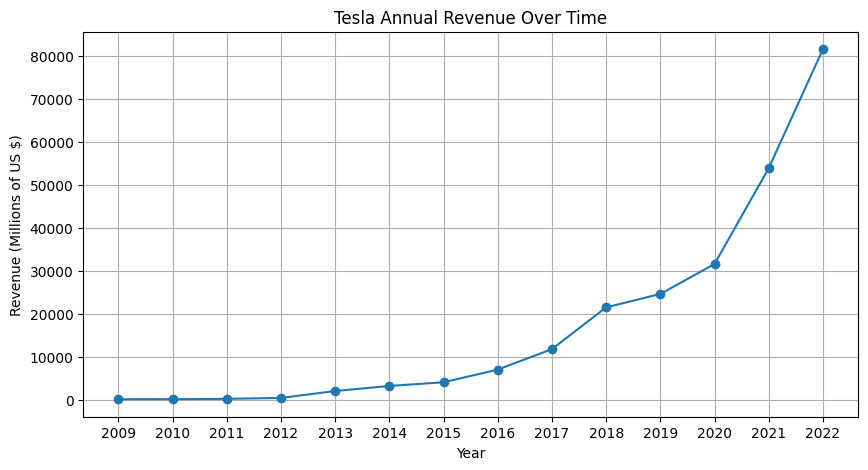

In [13]:
# Visualizations

# 1) Line Plot

# Convert the 'Tesla Annual Revenue (Millions of US $)' column to string for better plotting
df['Tesla Annual Revenue (Millions of US $)'] = df['Tesla Annual Revenue (Millions of US $)'].astype(str)

# Set the 'Tesla Annual Revenue (Millions of US $)' column as the index
df.set_index('Tesla Annual Revenue (Millions of US $)', inplace=True)

# Sort the DataFrame based on the index
df.sort_index(ascending=True, inplace=True)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Tesla Annual Revenue (Millions of US $).1'], marker='o')
plt.title('Tesla Annual Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Revenue (Millions of US $)')
plt.grid(True)
plt.show()

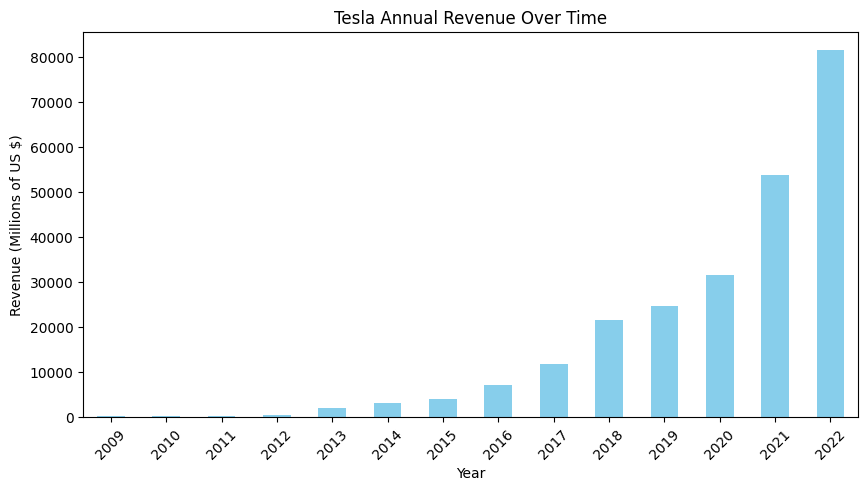

In [14]:
# Bar Chart

plt.figure(figsize=(10, 5))
df['Tesla Annual Revenue (Millions of US $).1'].plot(kind='bar', color='skyblue')
plt.title('Tesla Annual Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Revenue (Millions of US $)')
plt.xticks(rotation=45)
plt.show()

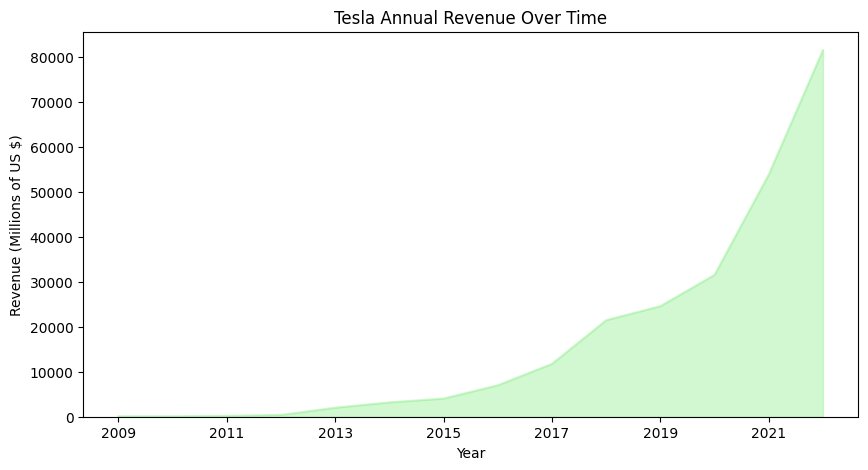

In [15]:

# Area Chart

plt.figure(figsize=(10, 5))
df['Tesla Annual Revenue (Millions of US $).1'].plot(kind='area', alpha=0.4, color='lightgreen')
plt.title('Tesla Annual Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Revenue (Millions of US $)')
plt.show()